# Application of Digital Signal Processing in Biomedical Signal Processing: ECG, EEG, EMG Analysis

In [16]:
# Required Libraries

#!pip install wfdb biosppy neurokit2

In [17]:
#!pip install --upgrade FuzzyTM neurokit2 wfdb biosppy

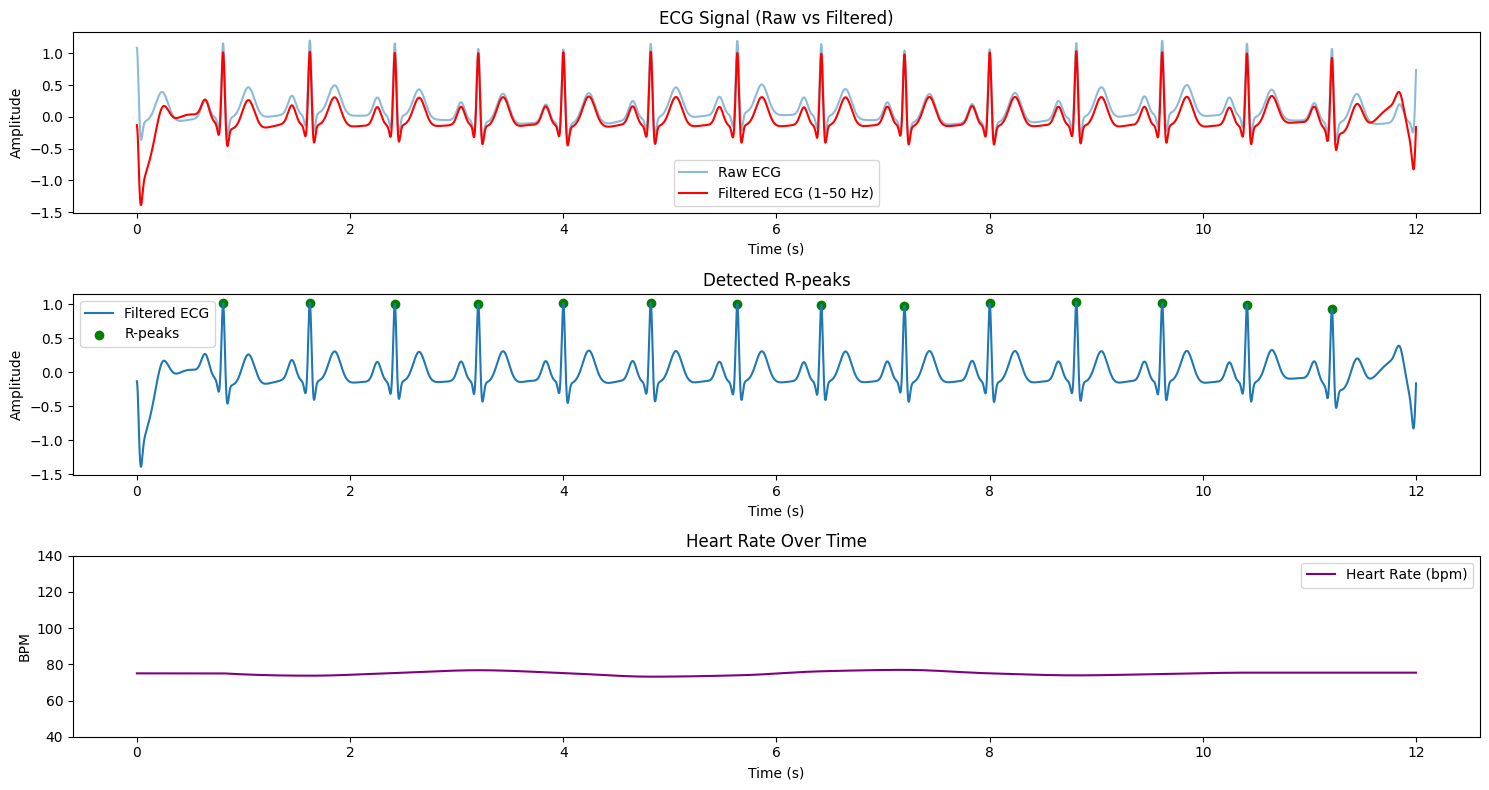

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
from scipy.signal import butter, filtfilt

#Simulate ECG
duration = 12  # seconds
sampling_rate = 500  # Hz
ecg_signal = nk.ecg_simulate(duration=duration, sampling_rate=sampling_rate, heart_rate=75)

#Bandpass filter (1–50 Hz)
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg_signal, lowcut=1, highcut=50, fs=sampling_rate)

#R-peak detection
ecg_cleaned = nk.ecg_clean(filtered_ecg, sampling_rate=sampling_rate)
_, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=sampling_rate)

#Compute heart rate
heart_rate = nk.ecg_rate(rpeaks['ECG_R_Peaks'], sampling_rate=sampling_rate, desired_length=len(filtered_ecg))

#Time vector for plotting
time = np.linspace(0, duration, len(filtered_ecg))

#Plotting
plt.figure(figsize=(15, 8))

#Plot raw and filtered signal
plt.subplot(3, 1, 1)
plt.plot(time, ecg_signal, label='Raw ECG', alpha=0.5)
plt.plot(time, filtered_ecg, label='Filtered ECG (1–50 Hz)', color='red')
plt.title("ECG Signal (Raw vs Filtered)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

#Plot R-peaks
plt.subplot(3, 1, 2)
plt.plot(time, filtered_ecg, label='Filtered ECG')
plt.scatter(rpeaks['ECG_R_Peaks'] / sampling_rate, filtered_ecg[rpeaks['ECG_R_Peaks']], color='green', label='R-peaks')
plt.title("Detected R-peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

#Plot Heart Rate
plt.subplot(3, 1, 3)
plt.plot(time, heart_rate, label='Heart Rate (bpm)', color='purple')
plt.title("Heart Rate Over Time")
plt.xlabel("Time (s)")
plt.ylabel("BPM")
plt.ylim(40, 140)
plt.legend()

plt.tight_layout()
plt.show()


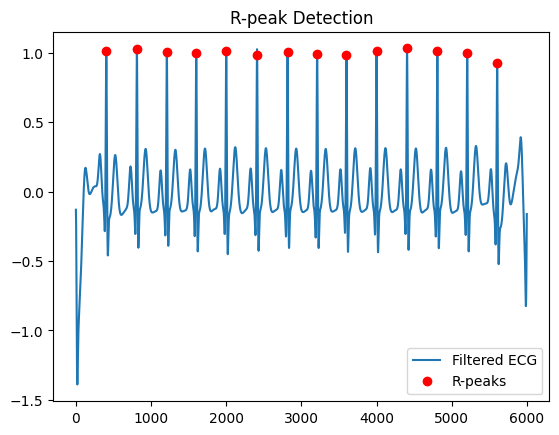

In [19]:
# R-peak Detection

signals, info = nk.ecg_process(filtered_ecg, sampling_rate)
r_peaks = info["ECG_R_Peaks"]

plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.show()

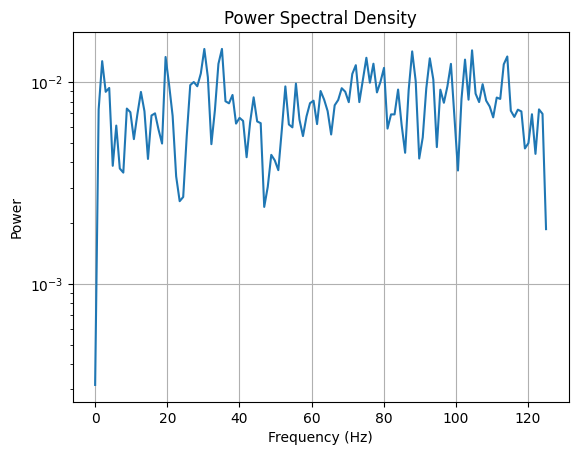

In [20]:
# Spectral Analysis of EEG or EMG (Optional)

from scipy.signal import welch

# Simulate random EEG
np.random.seed(0)
eeg = np.random.randn(1024)
f, Pxx = welch(eeg, fs=250)

plt.semilogy(f, Pxx)
plt.title("Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid(True)
plt.show()